<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
</figure>
    
# Reading shapefiles using pyshp

developed by Onno Ebbens



this notebook is created for the Mamba python course in order to create shapefiles using pyshp

table of content:<a class="anchor" id="0"></a>
1. [import files](#1)
2. [read shapefile data](#2)
3. [write shapefile data](#3)
3. [modify shapefile data](#4)
3. [plot shapefiles](#5)

## 1. Import files<a class="anchor" id="1"></a>

to install the pyshp package use:

`pip install pyshp`

to import the pyshp package use:

`import shapefile`

note that, unlike most python modules, the module is imported by a different name than the name of the package.

In [1]:
import matplotlib.pyplot as plt
import zipfile
import os
import pandas as pd
import datetime as dt
import numpy as np
import shapefile

Note the version of the pyshp module. This notebook was written for version 2.1.0.

In [2]:
print("The version of the pyshp module is :", shapefile.__version__)

The version of the pyshp module is : 2.0.1


Set figures to appear inline (so inside the notebook) and change the style to the "seaborn" style. Many people find this visually more appealing than default matplotlib.

In [3]:
#settings
%matplotlib inline
plt.style.use('seaborn')

## 2. Read shapefile data <a class="anchor" id="2"></a>

In [4]:
fileName = r"shapefile/Rotterdam_centraal.shp" ##file name
r = shapefile.Reader(fileName)

List of shapes in shapefile:

In [5]:
r.shapes()

[<shapefile.Shape at 0x19ad6f79390>, <shapefile.Shape at 0x19ace401f60>]

Print the bounding box (bbox) of the shapefile ([xmin, ymin, xmax, ymax]):

In [6]:
r.bbox

[91628.95841351096, 437487.57917564095, 91948.86010544216, 437913.434160098]

## 3. Write shapefile data <a class="anchor" id="3"></a>
Write shapefile using `shapefile.Writer` 

In [7]:
w = shapefile.Writer(target=r"shapefile/Rotterdam_centraal_v2.shp",  shapeType=r.shapeType)
w.fields = r.fields[1:]

for shprec in r.iterShapeRecords():
    points = shprec.shape.points
    w.poly([points])
    w.record(shprec.record[0])

w.close()

## 4. Modify shapefile data <a class="anchor" id="4"></a>

In [8]:
w = shapefile.Writer(target=r"shapefile/Rotterdam_centraal_resized.shp", shapeType=r.shapeType)
w.fields = r.fields[1:]

for shprec in r.iterShapeRecords():
    points = shprec.shape.points
    
    point1 = points[0]
    point2 = points[1]
    point3 = points[2]
    point4 = points[3]

    avgX = (point1[0] + point2[0] + point3[0] + point4[0])/4
    avgY = (point1[1] + point2[1] + point3[1] + point4[1])/4

    newX1 = 1.7*(point1[0] - avgX) + avgX
    newX2 = 1.7*(point2[0] - avgX) + avgX
    newX3 = 1.7*(point3[0] - avgX) + avgX
    newX4 = 1.7*(point4[0] - avgX) + avgX

    newY1 = 1.7*(point1[1] - avgY) + avgY
    newY2 = 1.7*(point2[1] - avgY) + avgY
    newY3 = 1.7*(point3[1] - avgY) + avgY
    newY4 = 1.7*(point4[1] - avgY) + avgY

    newPoint1 = [newX1, newY1]
    newPoint2 = [newX2, newY2]
    newPoint3 = [newX3, newY3]
    newPoint4 = [newX4, newY4]
    
    

    newPoints = [newPoint1, newPoint2, newPoint3, newPoint4, newPoint1, 
    newPoint1]

    w.poly([newPoints])
    w.record(shprec.record[0])

w.close()

## 5. Plot shapefiles<a id="5"></a>

For plotting polygons the `descartes` package is recommended. This package might also need to be installed using `pip`.

In [9]:
# Import descartes and matplotlib.pyplot
from descartes import PolygonPatch
import matplotlib.pyplot as plt

(437487.57917564095, 437913.434160098)

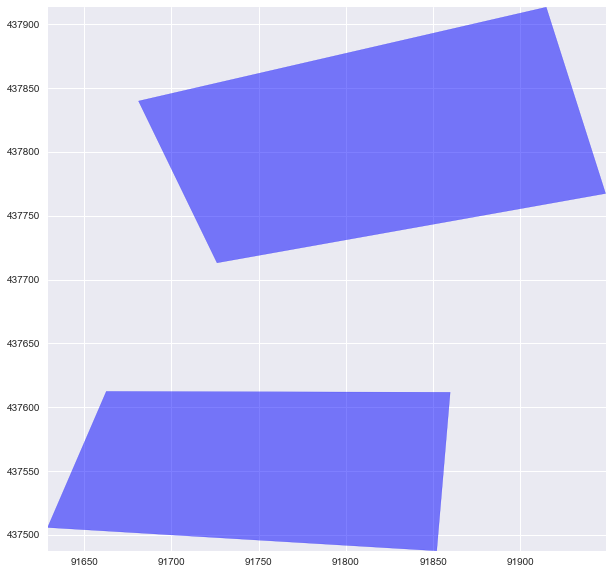

In [10]:
# Create a figure 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Loop over shapes and add patches based on the `__geo_interface__` attribute:
for ishp in r.shapes():
    poly = ishp.__geo_interface__
    # Set facecolor, edgecolor, transparency
    polypatch = PolygonPatch(poly, fc="b", ec="b", alpha=0.5)
    ax.add_patch(polypatch)

# Manually set ax limits as adding patches does not automatically change the view window:
ax.set_xlim(r.bbox[0], r.bbox[2])
ax.set_ylim(r.bbox[1], r.bbox[3])